# Incidence

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from hyperbolic_optics.structure import Structure
import json
import matplotlib.patches as patches
from matplotlib.ticker import FixedFormatter

In [17]:
plt.rcParams.update(
        {
            "font.size": 16,
            "axes.labelsize": 16,
            "axes.titlesize": 16,
            "xtick.labelsize": 14,
            "ytick.labelsize": 14,
            "legend.fontsize": 14,
            "font.family": "arial",
        }
    )

In [44]:
eps_prism = 1.5

payload = json.dumps({
    "ScenarioData": {
    "type": "Incident",
},
"Layers": [
    {
        "type": "Ambient Incident Layer",
        "permittivity": eps_prism
    },
    {
        "type": "Isotropic Middle-Stack Layer",
        "thickness": 1.5
    },
    {
        "type": "Semi Infinite Anisotropic Layer",
        "material": "Quartz",
        "rotationX": 0,
        "rotationY": 45,
        "rotationZ": 50,
    }
],
})
payload = json.loads(payload)

structure = Structure()
structure.get_scenario(payload.get('ScenarioData'))
structure.get_layers(payload.get("Layers", None))
layer = structure.layers[2]

x_axis = np.round(np.degrees(structure.incident_angle), 1)
frequency = structure.frequency

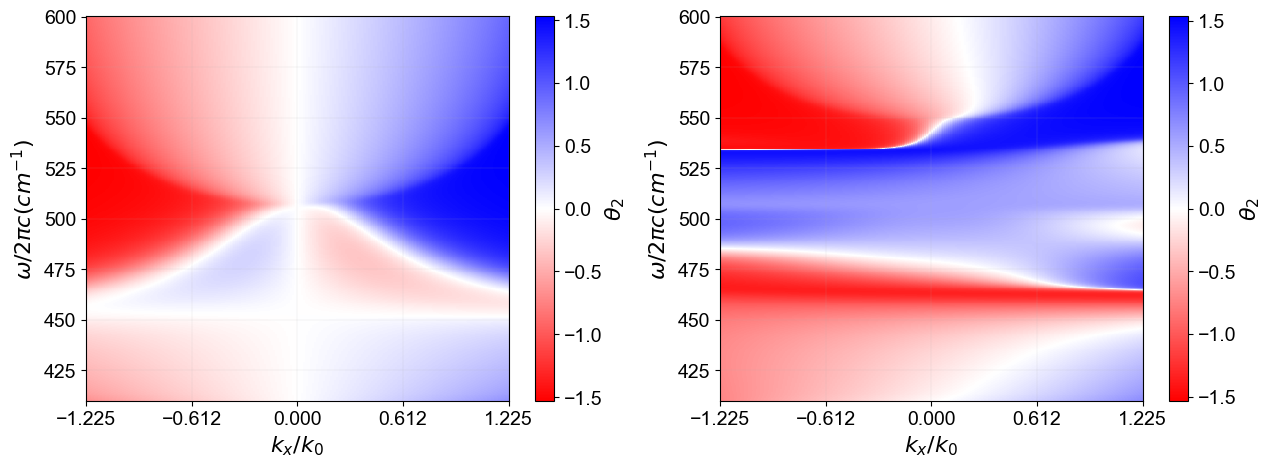

In [45]:
refraction_angle = tf.math.atan(layer.profile.transmitted_Px/layer.profile.transmitted_Pz)

fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), (refraction_angle[:,:,0]), cmap='bwr_r')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), (refraction_angle[:,:,1]), cmap='bwr_r')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label(r'$\theta_{2}$', labelpad=1)
cbar2.set_label(r'$\theta_{2}$', labelpad=1)
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

plt.show()

# Section

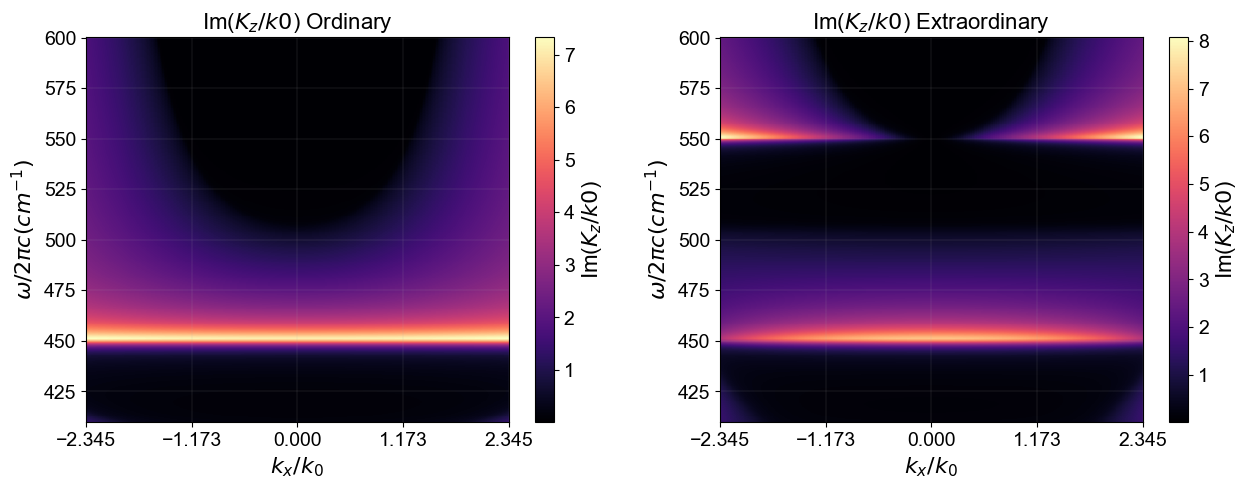

In [5]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.imag(layer.profile.transmitted_k_z[:,:,0]), cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.imag(layer.profile.transmitted_k_z[:,:,1]), cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('Im($K_z/k0$)')
cbar2.set_label('Im($K_z/k0$)')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('Im($K_z/k0$) Ordinary')
axs[1].set_title(f'Im($K_z/k0$) Extraordinary')


plt.show()

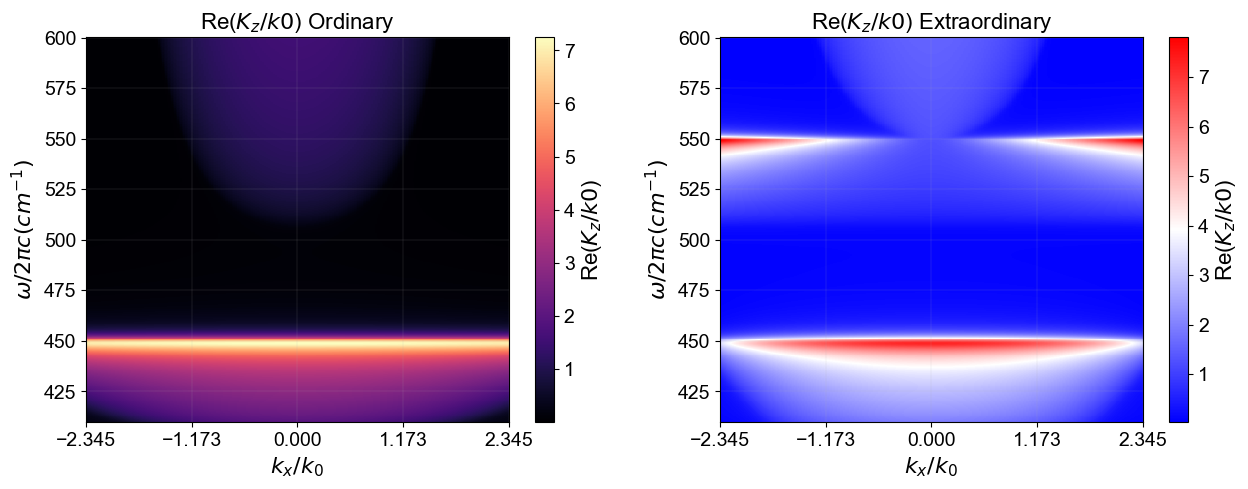

In [6]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.real(layer.profile.transmitted_k_z[:,:,0]), cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.real(layer.profile.transmitted_k_z[:,:,1]), cmap='bwr')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('Re($K_z/k0$)')
cbar2.set_label('Re($K_z/k0$)')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('Re($K_z/k0$) Ordinary')
axs[1].set_title(f'Re($K_z/k0$) Extraordinary')


plt.show()

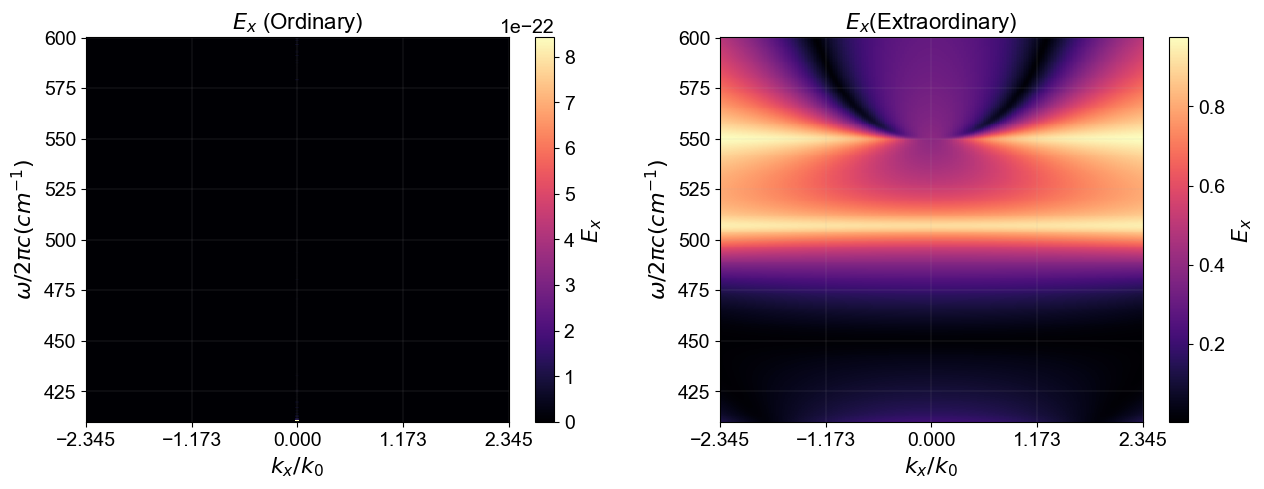

In [7]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile.transmitted_Ex[:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile.transmitted_Ex[:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$E_x$')
cbar2.set_label('$E_x$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$E_x$ (Ordinary)')
axs[1].set_title(f'$E_x$(Extraordinary)')


plt.show()

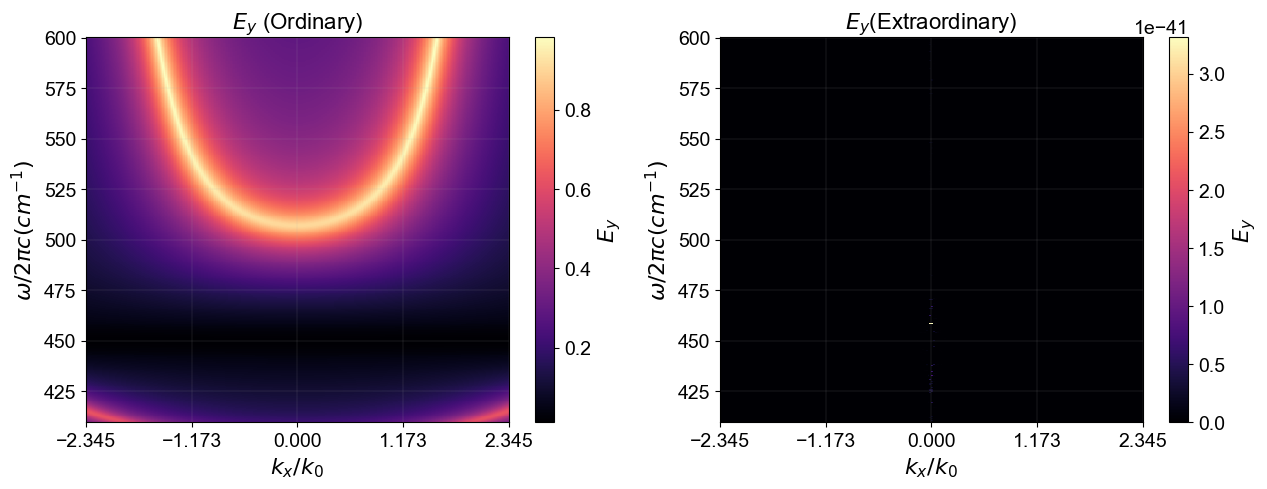

In [8]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile.transmitted_Ey[:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile.transmitted_Ey[:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$E_y$')
cbar2.set_label('$E_y$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$E_y$ (Ordinary)')
axs[1].set_title(f'$E_y$(Extraordinary)')


plt.show()

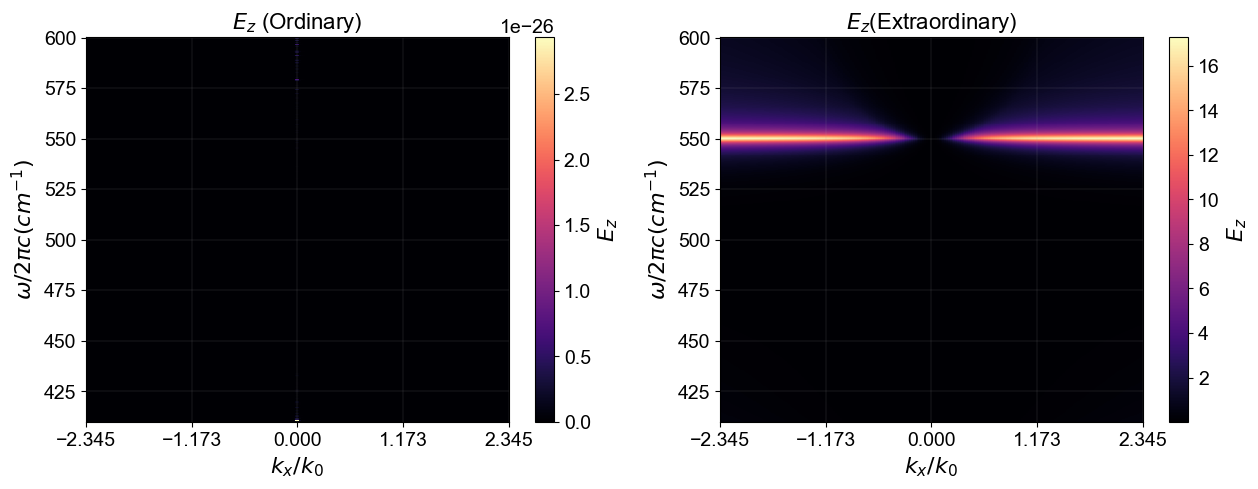

In [9]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile.transmitted_Ez[:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile.transmitted_Ez[:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$E_z$')
cbar2.set_label('$E_z$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$E_z$ (Ordinary)')
axs[1].set_title(f'$E_z$(Extraordinary)')


plt.show()

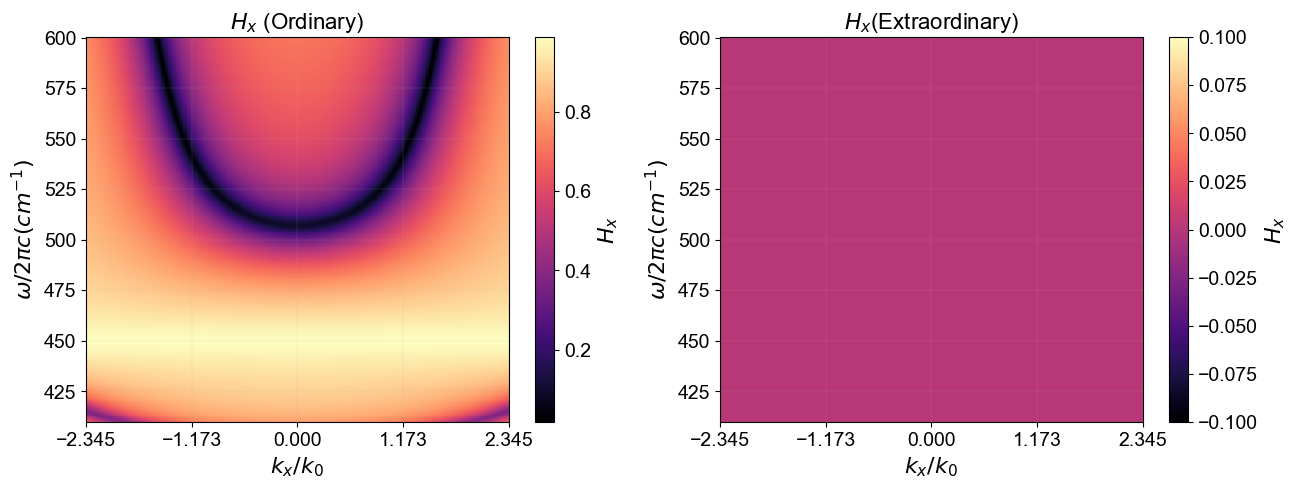

In [10]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile.transmitted_Hx[:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile.transmitted_Hx[:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$H_x$')
cbar2.set_label('$H_x$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$H_x$ (Ordinary)')
axs[1].set_title(f'$H_x$(Extraordinary)')


plt.show()

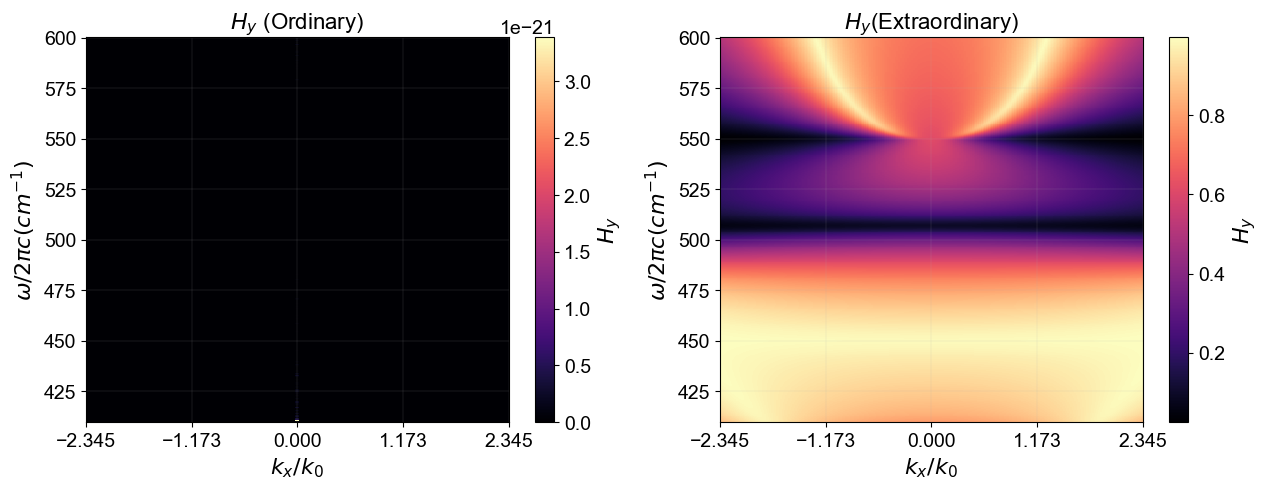

In [11]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile.transmitted_Hy[:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile.transmitted_Hy[:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$H_y$')
cbar2.set_label('$H_y$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$H_y$ (Ordinary)')
axs[1].set_title(f'$H_y$(Extraordinary)')


plt.show()

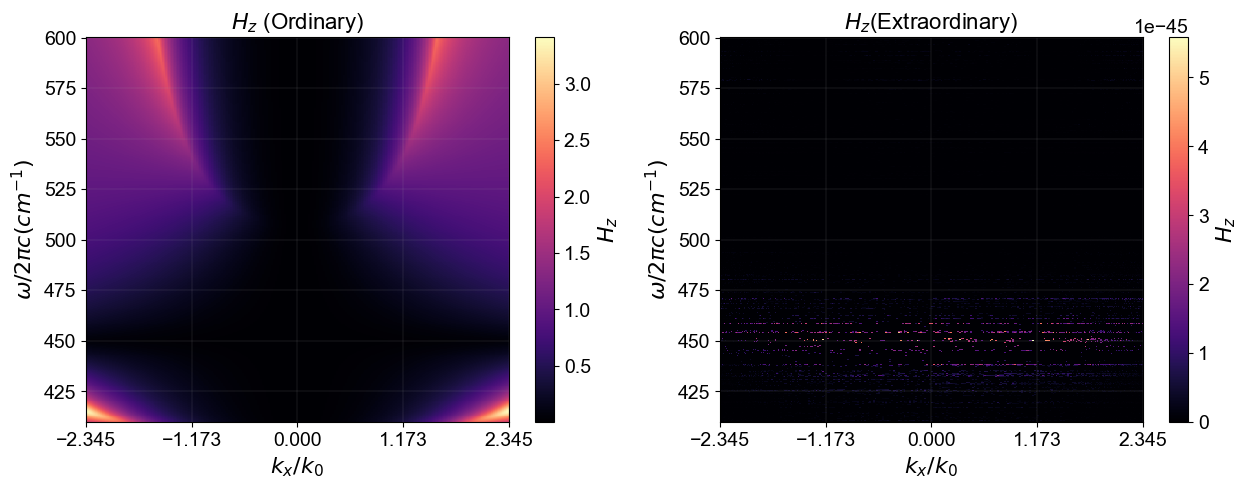

In [12]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile.transmitted_Hz[:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile.transmitted_Hz[:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$H_z$')
cbar2.set_label('$H_z$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$H_z$ (Ordinary)')
axs[1].set_title(f'$H_z$(Extraordinary)')


plt.show()

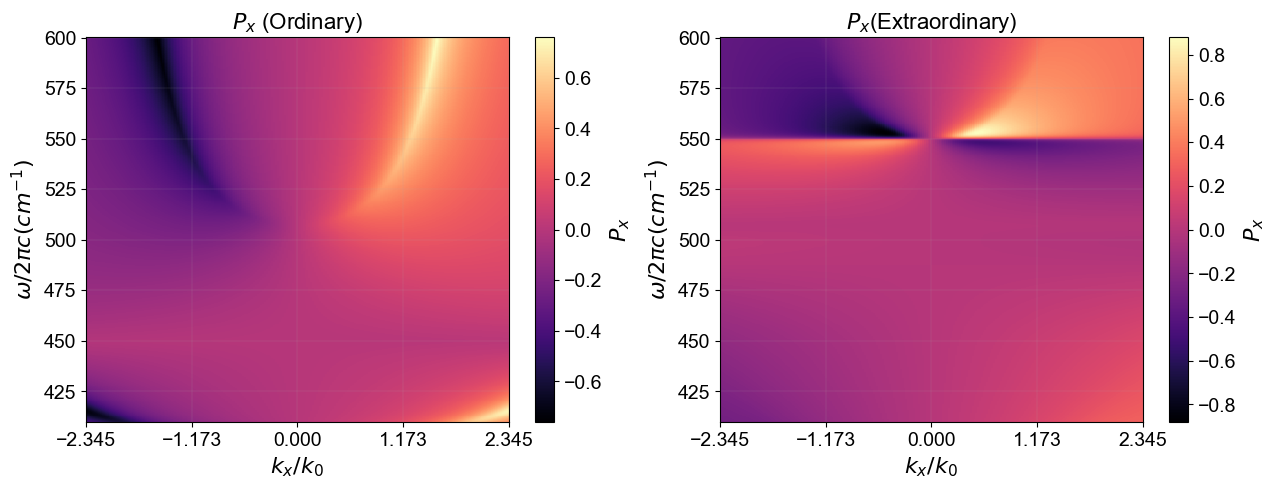

In [13]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), (layer.profile.transmitted_Px[:,:,0]), cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), (layer.profile.transmitted_Px[:,:,1]), cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$P_x$')
cbar2.set_label('$P_x$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$P_x$ (Ordinary)')
axs[1].set_title(f'$P_x$(Extraordinary)')


plt.show()

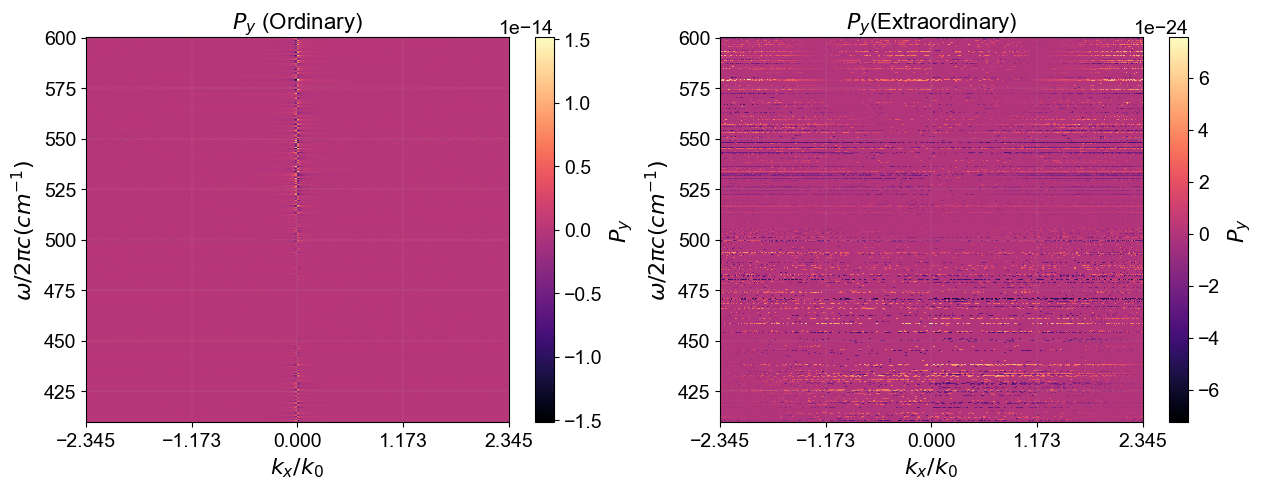

In [14]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), (layer.profile.transmitted_Py[:,:,0]), cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), (layer.profile.transmitted_Py[:,:,1]), cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$P_y$')
cbar2.set_label('$P_y$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$P_y$ (Ordinary)')
axs[1].set_title(f'$P_y$(Extraordinary)')


plt.show()

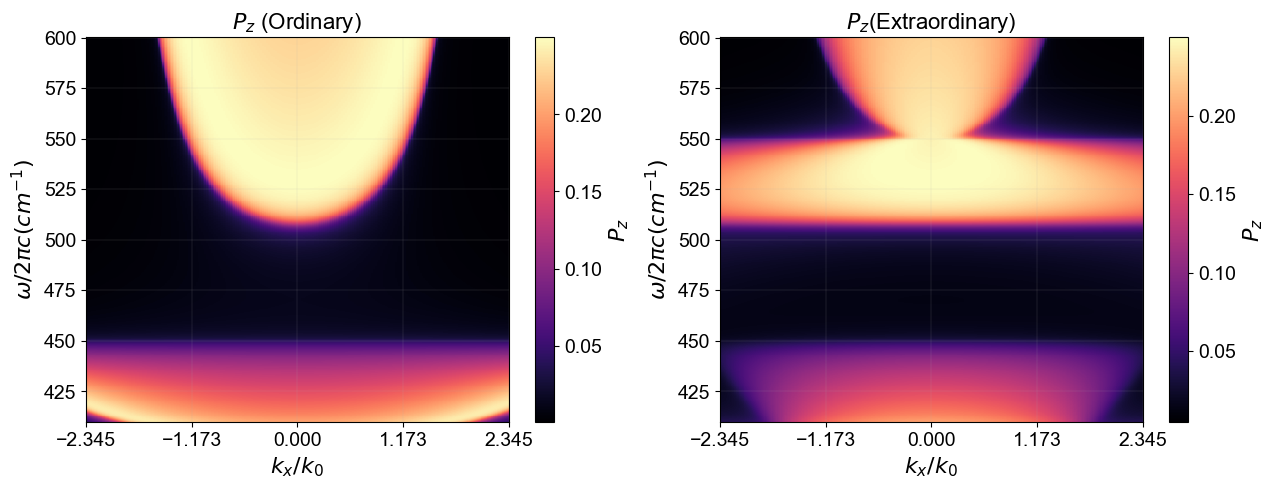

In [15]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), (layer.profile.transmitted_Pz[:,:,0]), cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), (layer.profile.transmitted_Pz[:,:,1]), cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$P_z$')
cbar2.set_label('$P_z$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$P_z$ (Ordinary)')
axs[1].set_title(f'$P_z$(Extraordinary)')


plt.show()

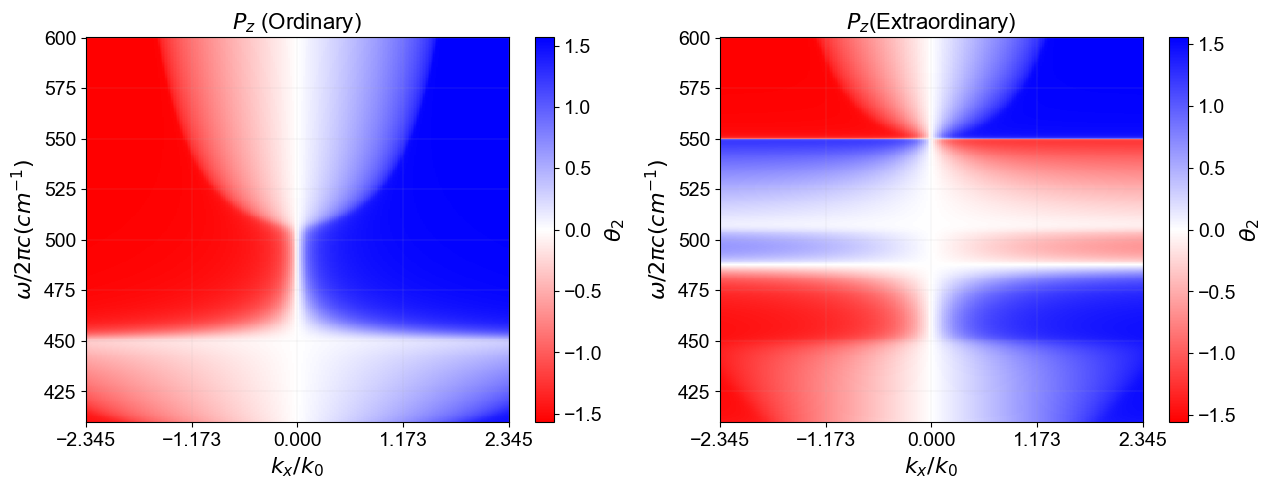

In [16]:
refraction_angle = tf.math.atan(layer.profile.transmitted_Px/layer.profile.transmitted_Pz)

fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), (refraction_angle[:,:,0]), cmap='bwr_r')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), (refraction_angle[:,:,1]), cmap='bwr_r')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label(r'$\theta_{2}$', labelpad=1)
cbar2.set_label(r'$\theta_{2}$', labelpad=1)
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

plt.show()

# Azimuthal Rotation

In [502]:
payload = json.dumps({
    "ScenarioData": {
    "type": "Azimuthal",
    "incidentAngle": 30.,
},
"Layers": [
    {
        "type": "Ambient Incident Layer",
        "permittivity": 5.5
    },
    {
        "type": "Semi Infinite Anisotropic Layer",
        "material": "Quartz",
        "rotationX": 0,
        "rotationY": 90.,
        "rotationZ": 0,
    }
],
})
payload = json.loads(payload)

In [503]:
structure = Structure()
structure.get_scenario(payload.get('ScenarioData'))
structure.get_layers(payload.get("Layers", None))
layer = structure.layers[1]

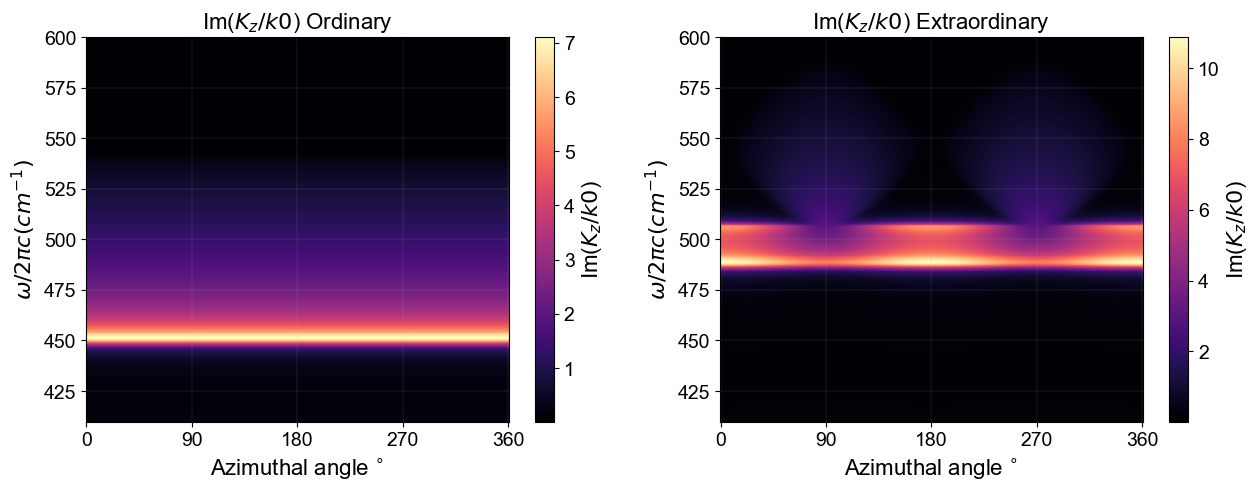

In [504]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.imag(layer.profile.transmitted_k_z[:,:,0]), cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.imag(layer.profile.transmitted_k_z[:,:,1]), cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('Im($K_z/k0$)')
cbar2.set_label('Im($K_z/k0$)')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('Im($K_z/k0$) Ordinary')
axs[1].set_title(f'Im($K_z/k0$) Extraordinary')


plt.show()

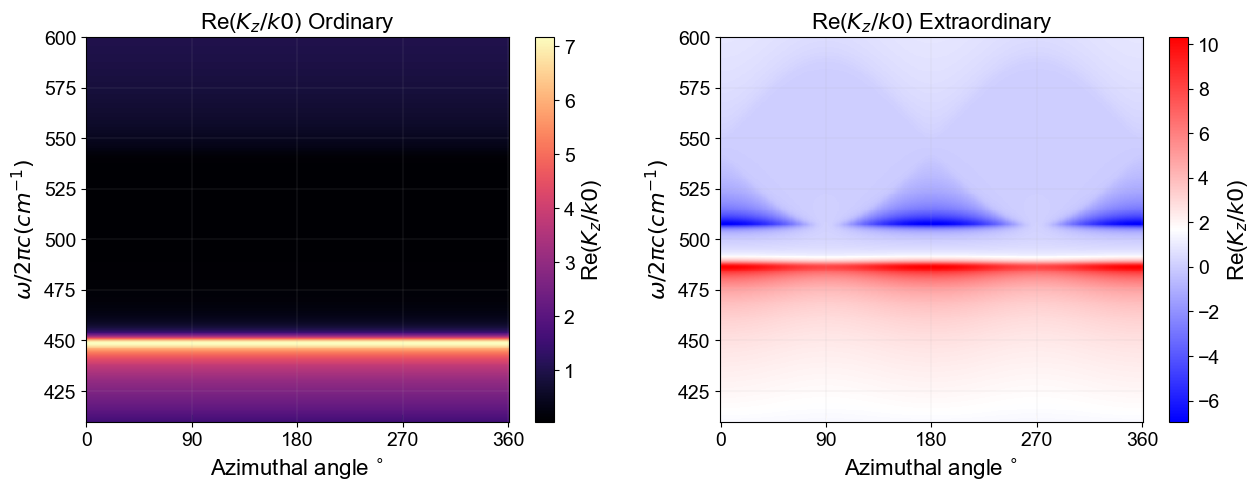

In [505]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.real(layer.profile.transmitted_k_z[:,:,0]), cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.real(layer.profile.transmitted_k_z[:,:,1]), cmap='bwr')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('Re($K_z/k0$)')
cbar2.set_label('Re($K_z/k0$)')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('Re($K_z/k0$) Ordinary')
axs[1].set_title(f'Re($K_z/k0$) Extraordinary')


plt.show()

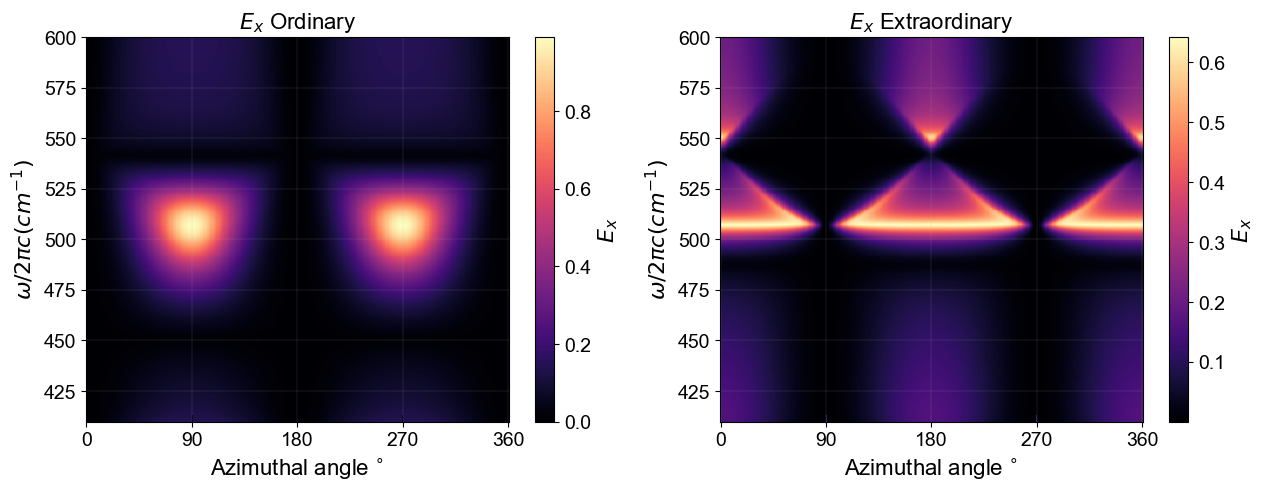

In [506]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile.transmitted_Ex[:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile.transmitted_Ex[:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$E_x$')
cbar2.set_label('$E_x$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$E_x$ Ordinary')
axs[1].set_title(f'$E_x$ Extraordinary')


plt.show()

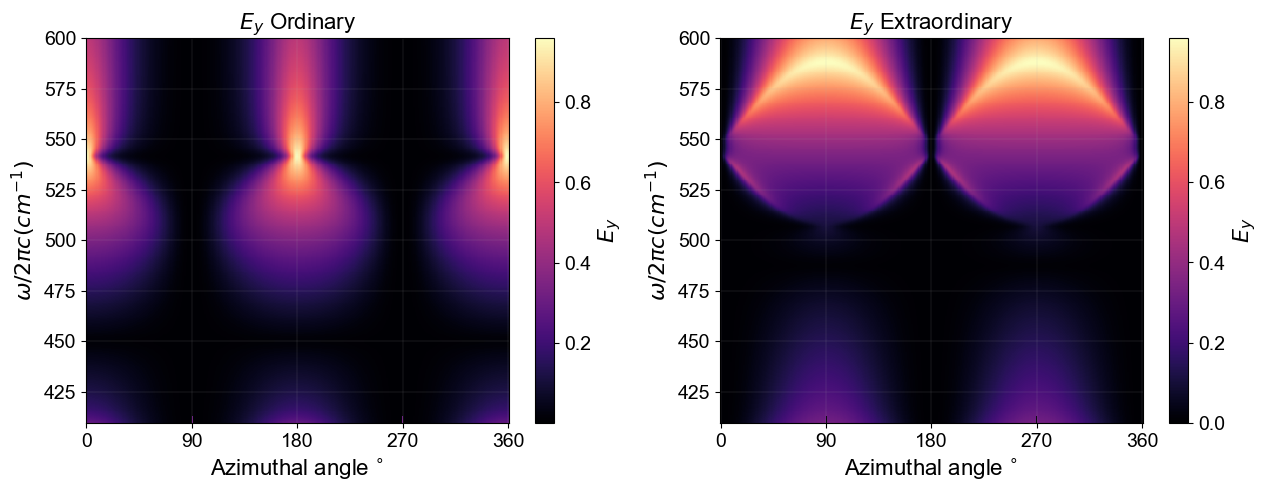

In [507]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile.transmitted_Ey[:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile.transmitted_Ey[:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$E_y$')
cbar2.set_label('$E_y$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$E_y$ Ordinary')
axs[1].set_title(f'$E_y$ Extraordinary')


plt.show()

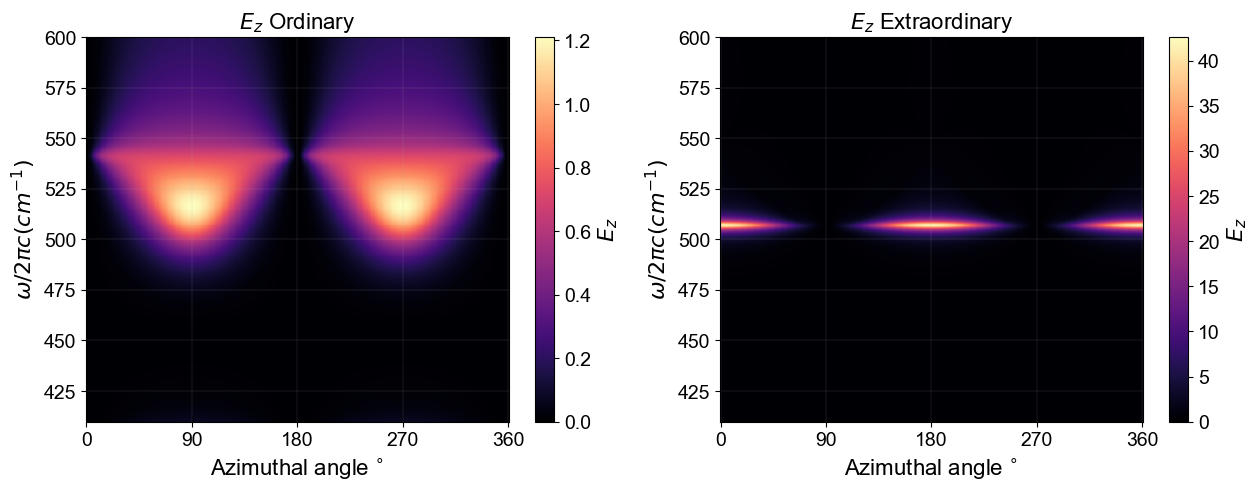

In [508]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile.transmitted_Ez[:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile.transmitted_Ez[:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$E_z$')
cbar2.set_label('$E_z$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$E_z$ Ordinary')
axs[1].set_title(f'$E_z$ Extraordinary')


plt.show()

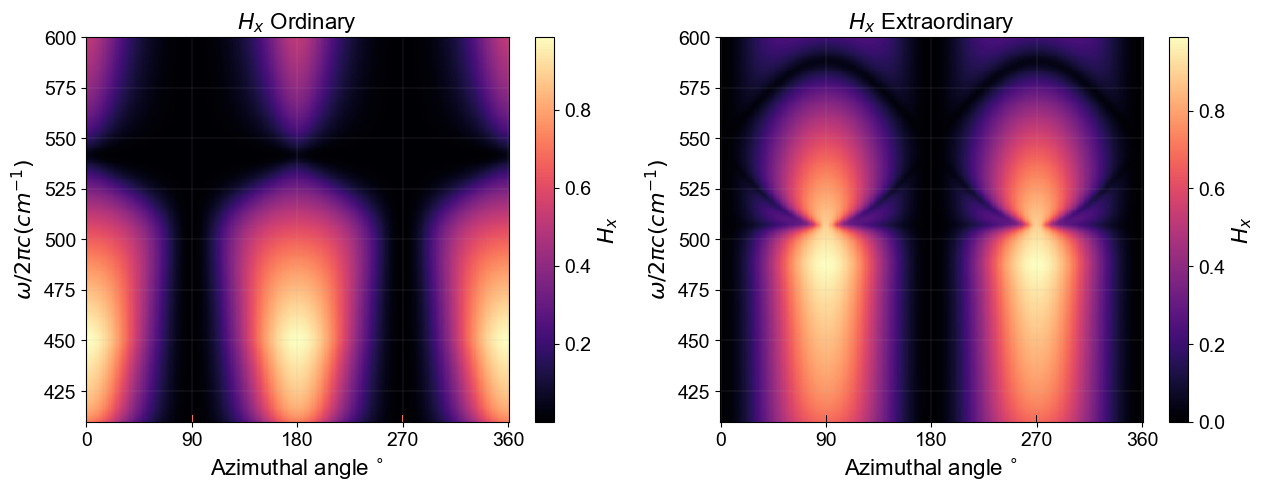

In [509]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile.transmitted_Hx[:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile.transmitted_Hx[:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$H_x$')
cbar2.set_label('$H_x$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$H_x$ Ordinary')
axs[1].set_title(f'$H_x$ Extraordinary')


plt.show()

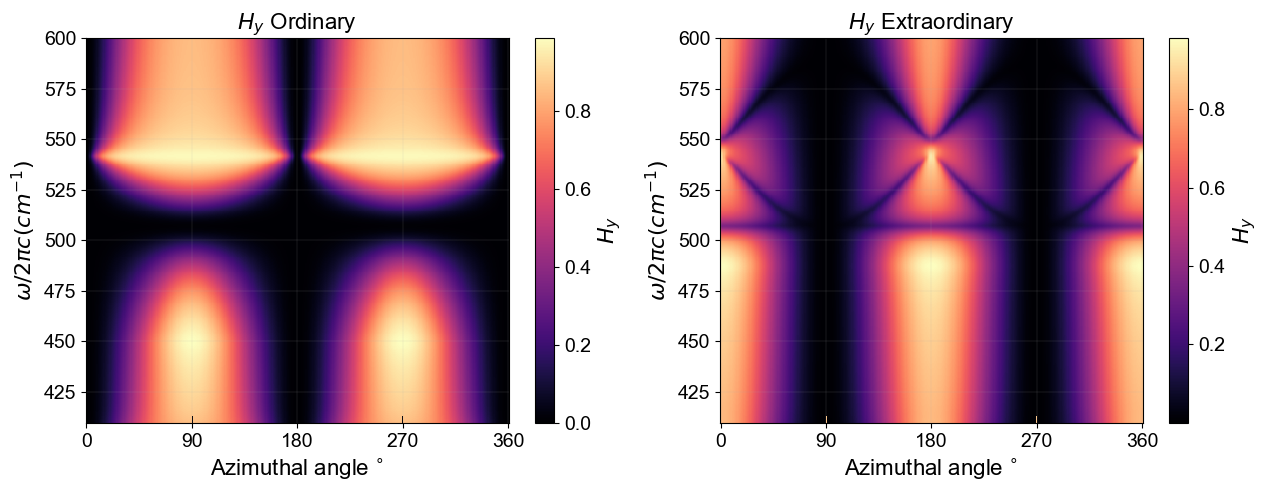

In [510]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile.transmitted_Hy[:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile.transmitted_Hy[:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$H_y$')
cbar2.set_label('$H_y$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$H_y$ Ordinary')
axs[1].set_title(f'$H_y$ Extraordinary')


plt.show()

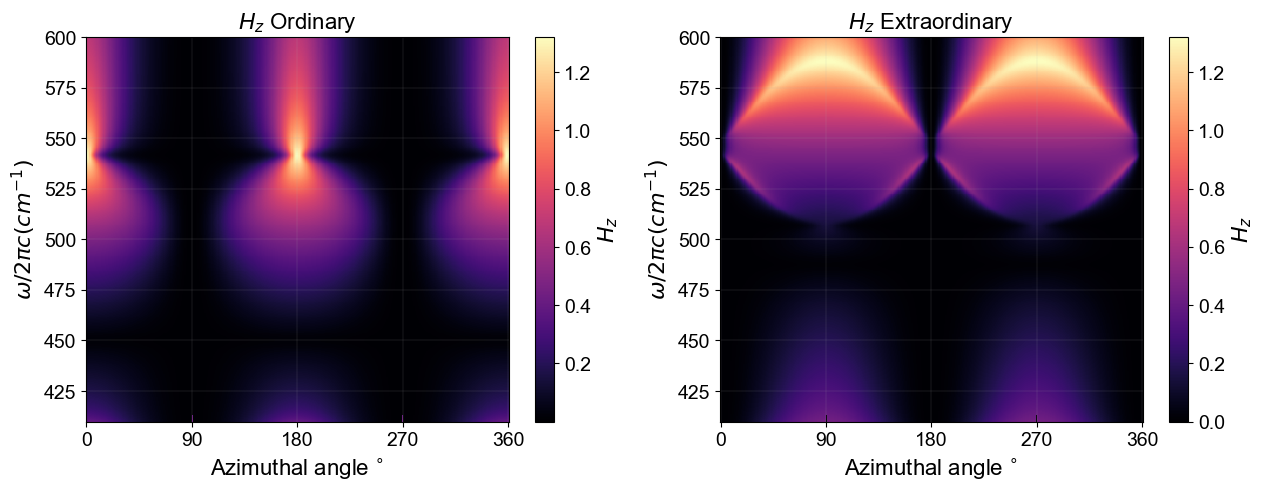

In [511]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile.transmitted_Hz[:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile.transmitted_Hz[:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$H_z$')
cbar2.set_label('$H_z$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$H_z$ Ordinary')
axs[1].set_title(f'$H_z$ Extraordinary')


plt.show()

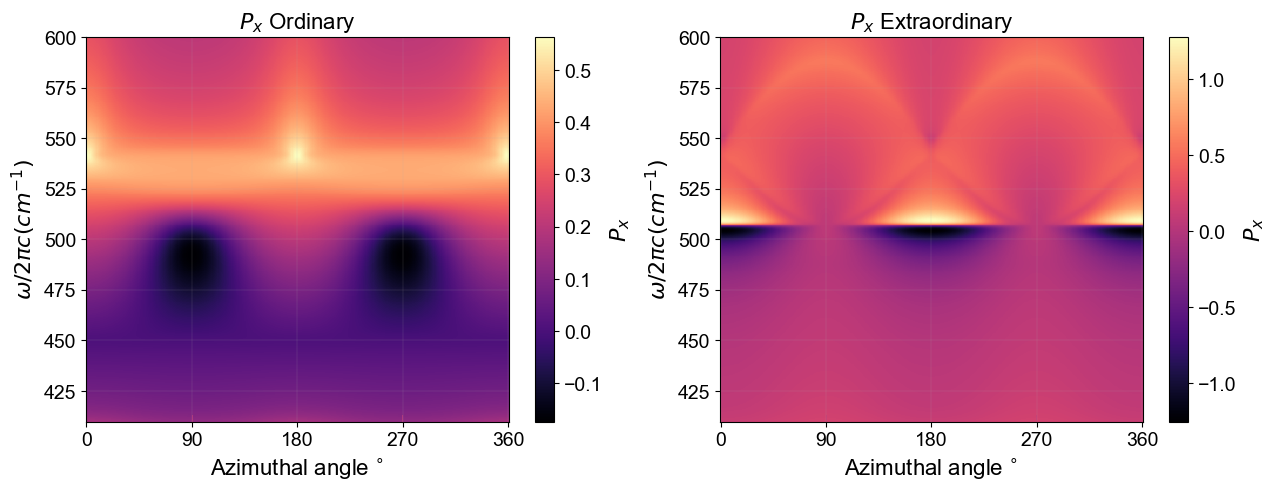

In [512]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), layer.profile.transmitted_Px[:,:,0], cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), layer.profile.transmitted_Px[:,:,1], cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$P_x$')
cbar2.set_label('$P_x$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$P_x$ Ordinary')
axs[1].set_title(f'$P_x$ Extraordinary')


plt.show()

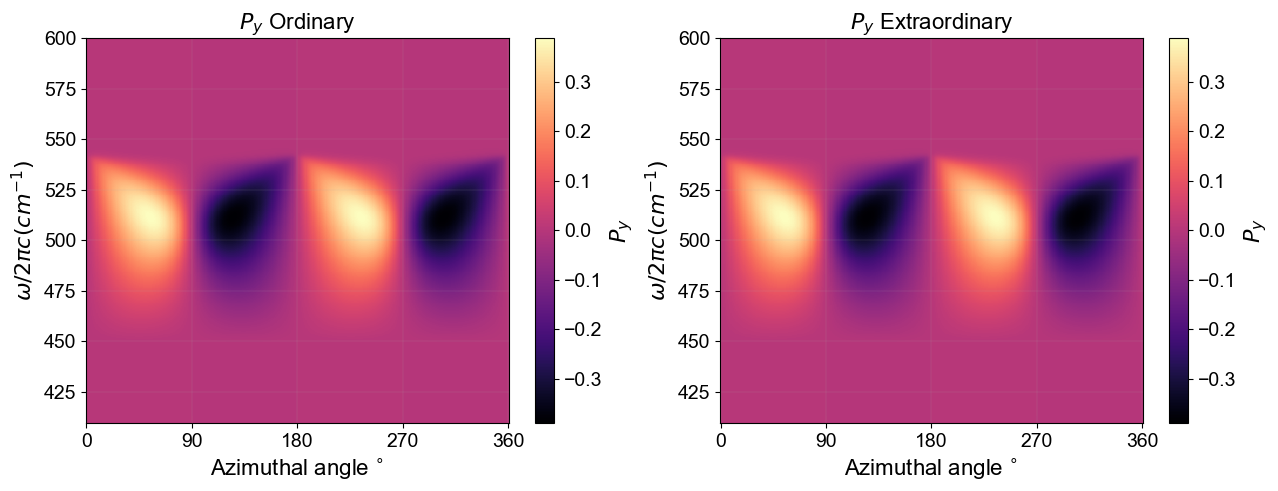

In [513]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), layer.profile.transmitted_Py[:,:,0], cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), layer.profile.transmitted_Py[:,:,0], cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$P_y$')
cbar2.set_label('$P_y$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$P_y$ Ordinary')
axs[1].set_title(f'$P_y$ Extraordinary')


plt.show()

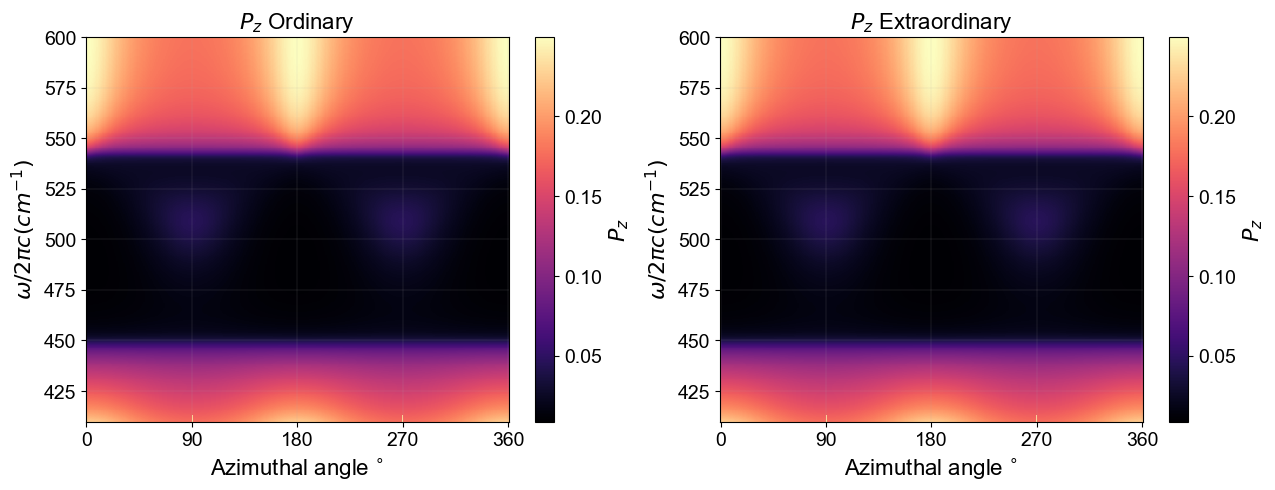

In [514]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), layer.profile.transmitted_Pz[:,:,0], cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), layer.profile.transmitted_Pz[:,:,0], cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$P_z$')
cbar2.set_label('$P_z$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$P_z$ Ordinary')
axs[1].set_title(f'$P_z$ Extraordinary')


plt.show()

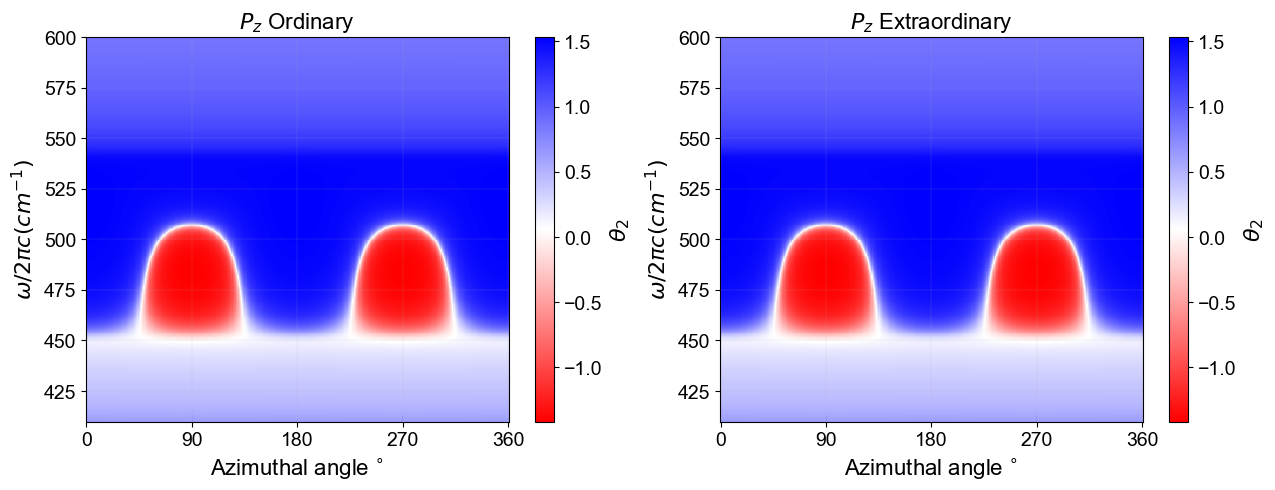

In [515]:
refraction_angle = tf.math.atan(layer.profile.transmitted_Px/layer.profile.transmitted_Pz)

fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), refraction_angle[:,:,0], cmap='bwr_r')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), refraction_angle[:,:,0], cmap='bwr_r')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$\\theta_2$')
cbar2.set_label('$\\theta_2$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$P_z$ Ordinary')
axs[1].set_title(f'$P_z$ Extraordinary')


plt.show()

# Dispersion

In [73]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from hyperbolic_optics.structure import Structure
import json
import matplotlib.patches as patches
plt.rcParams.update(
        {
            "font.size": 16,
            "axes.labelsize": 16,
            "axes.titlesize": 16,
            "xtick.labelsize": 14,
            "ytick.labelsize": 14,
            "legend.fontsize": 14,
            "font.family": "arial",
        }
    )

In [87]:
eps_prism = 2.5
payload = json.dumps({
    "ScenarioData": {
    "type": "Dispersion",
    "frequency": 545,
},
"Layers": [
    {
        "type": "Ambient Incident Layer",
        "permittivity": eps_prism
    },
    {
        "type": "Semi Infinite Anisotropic Layer",
        "material": "Quartz",
        "rotationX": 0,
        "rotationY": 60.,
        "rotationZ": 0,
    }
],
})
payload = json.loads(payload)

structure = Structure()
structure.get_scenario(payload.get('ScenarioData'))
structure.get_layers(payload.get("Layers", None))
layer = structure.layers[-1]

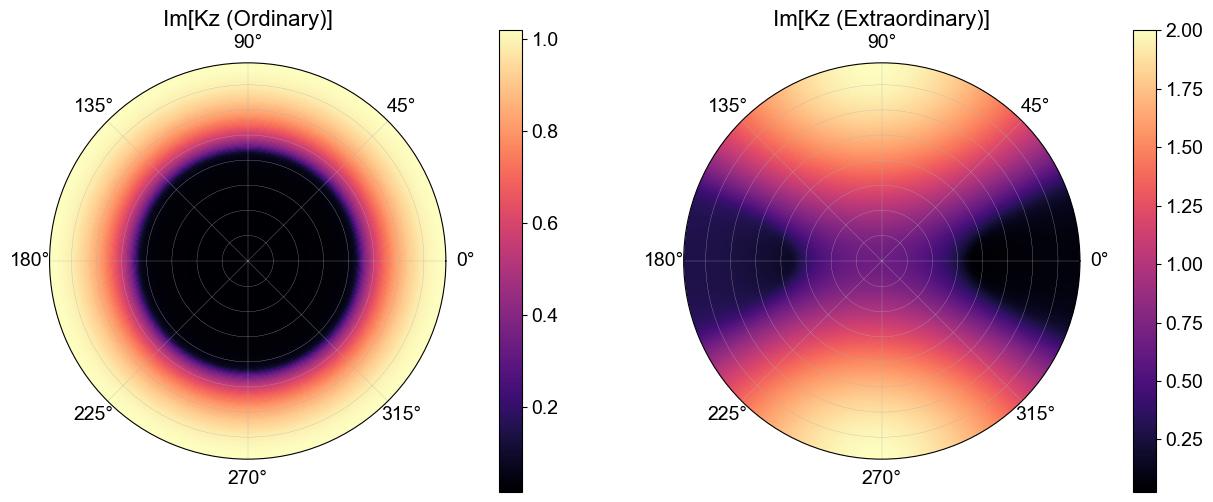

In [88]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.imag(layer.profile.transmitted_k_z[:,:,0]), cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.imag(layer.profile.transmitted_k_z[:,:,1]), cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.1)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.1)
axs[0].grid(linewidth=0.2)
axs[1].grid(linewidth=0.2)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title('Im[Kz (Ordinary)]')
axs[1].set_title('Im[Kz (Extraordinary)]')
plt.show()

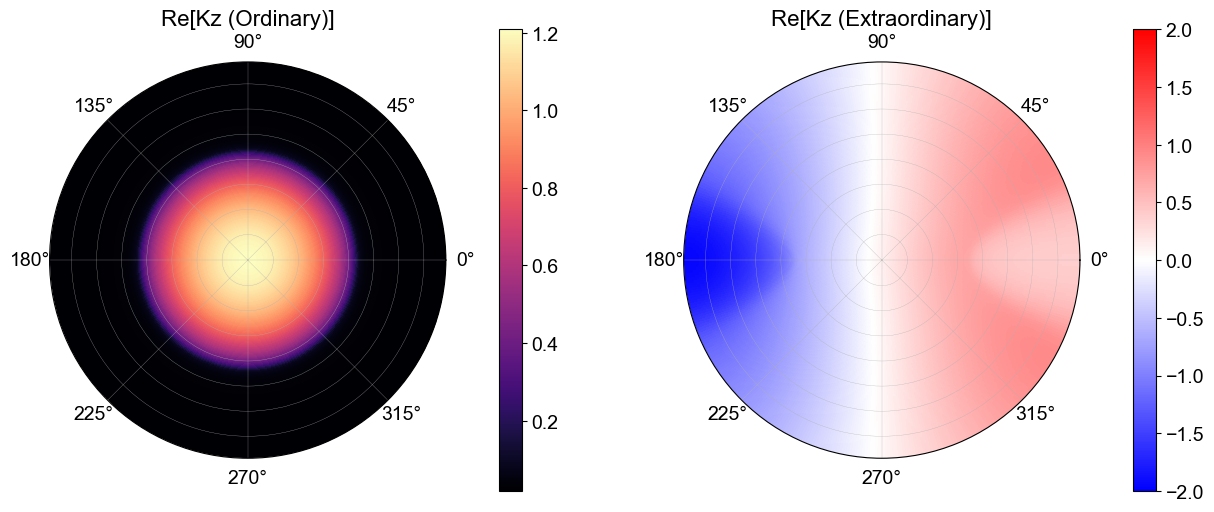

In [89]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.real(layer.profile.transmitted_k_z[:,:,0]), cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.real(layer.profile.transmitted_k_z[:,:,1]), cmap='bwr', vmin = -(np.abs(layer.profile.transmitted_k_z[:,:,1].numpy()).max()), vmax = np.abs(layer.profile.transmitted_k_z[:,:,1].numpy()).max())
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.1)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.1)
axs[0].grid(linewidth=0.2)
axs[0].set_yticklabels([])
axs[1].grid(linewidth=0.2)
axs[1].set_yticklabels([])
axs[0].set_title('Re[Kz (Ordinary)]')
axs[1].set_title('Re[Kz (Extraordinary)]')
plt.show()

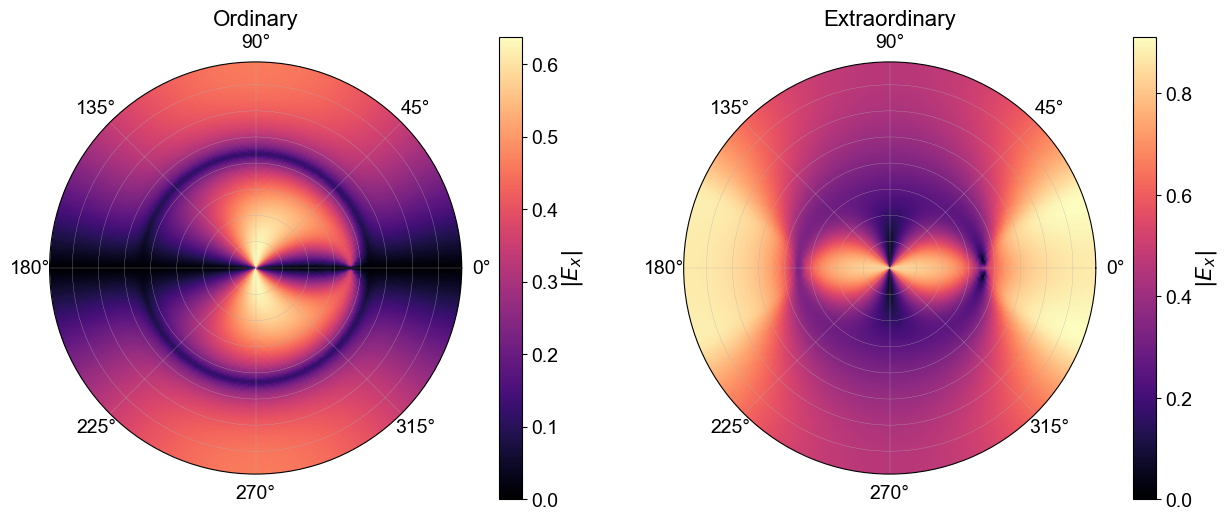

In [90]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile.transmitted_Ex[:,:,0])**2.), cmap='magma', vmin=0.)
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile.transmitted_Ex[:,:,1])**2.), cmap='magma', vmin=0.)
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.07)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.07)

cbar1.set_label(r'$|E_x|$', labelpad=1)
cbar2.set_label(r'$|E_x|$', labelpad=1)

axs[0].grid(linewidth=0.2)
axs[1].grid(linewidth=0.2)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title(r'Ordinary')
axs[1].set_title(r'Extraordinary')

plt.show()

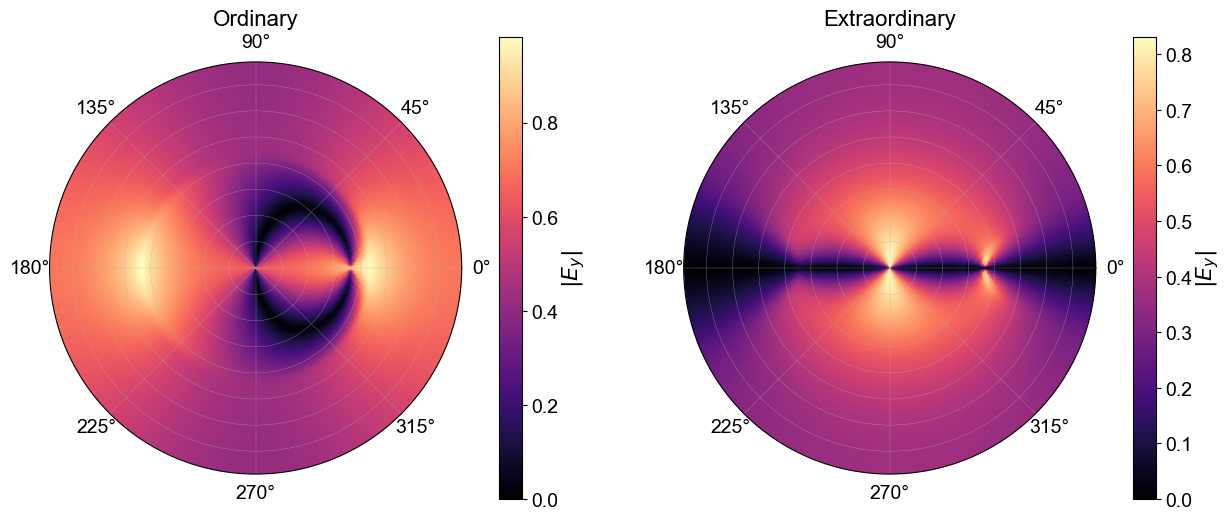

In [91]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile.transmitted_Ey[:,:,0])**2.), cmap='magma', vmin=0.)
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile.transmitted_Ey[:,:,1])**2.), cmap='magma', vmin=0.)
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.07)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.07)

cbar1.set_label(r'$|E_y|$', labelpad=1)
cbar2.set_label(r'$|E_y|$', labelpad=1)

axs[0].grid(linewidth=0.2)
axs[1].grid(linewidth=0.2)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title(r'Ordinary')
axs[1].set_title(r'Extraordinary')
plt.show()

Text(0.5, 1.0, 'Extraordinary')

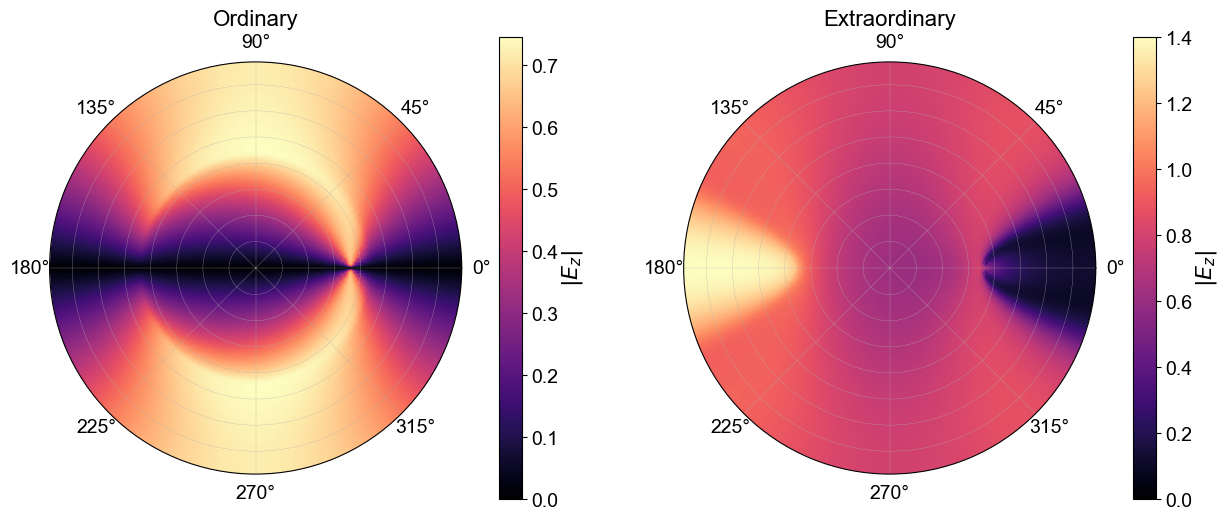

In [92]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile.transmitted_Ez[:,:,0])**2.), cmap='magma', vmin=0.)
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile.transmitted_Ez[:,:,1])**2.), cmap='magma', vmin=0.)
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.07)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.07)

cbar1.set_label(r'$|E_z|$', labelpad=1)
cbar2.set_label(r'$|E_z|$', labelpad=1)

axs[0].grid(linewidth=0.2)
axs[1].grid(linewidth=0.2)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title(r'Ordinary')
axs[1].set_title(r'Extraordinary')

Text(0.5, 1.0, 'Extraordinary')

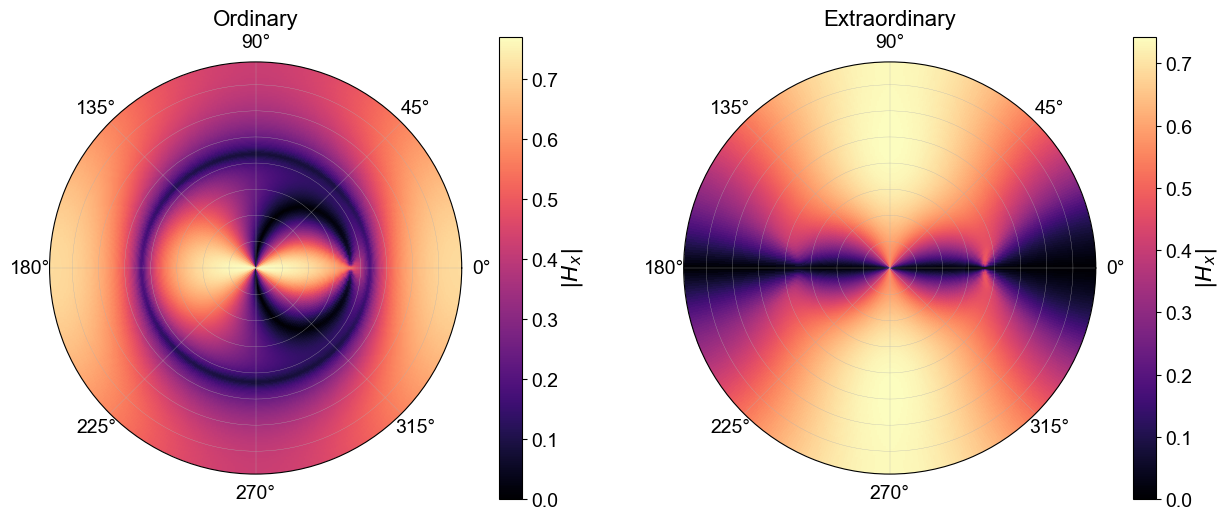

In [93]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile.transmitted_Hx[:,:,0])**2.), cmap='magma', vmin=0.)
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile.transmitted_Hx[:,:,1])**2.), cmap='magma', vmin=0.)
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.07)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.07)

cbar1.set_label(r'$|H_x|$', labelpad=1)
cbar2.set_label(r'$|H_x|$', labelpad=1)

axs[0].grid(linewidth=0.2)
axs[1].grid(linewidth=0.2)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title(r'Ordinary')
axs[1].set_title(r'Extraordinary')

Text(0.5, 1.0, 'Extraordinary')

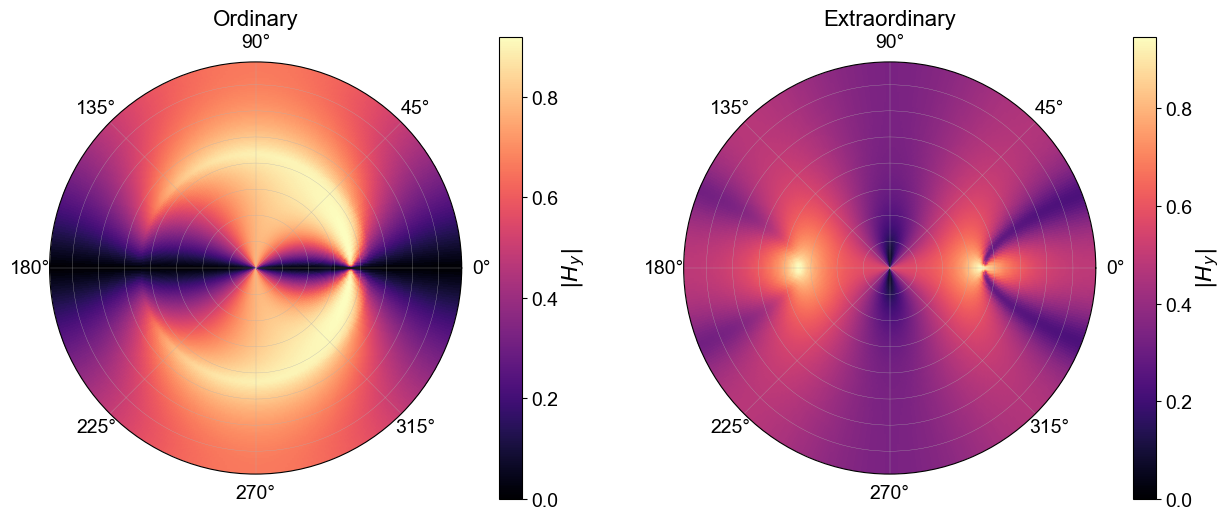

In [94]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile.transmitted_Hy[:,:,0])**2.), cmap='magma', vmin=0.)
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile.transmitted_Hy[:,:,1])**2.), cmap='magma', vmin=0.)
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.07)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.07)

cbar1.set_label(r'$|H_y|$', labelpad=1)
cbar2.set_label(r'$|H_y|$', labelpad=1)

axs[0].grid(linewidth=0.2)
axs[1].grid(linewidth=0.2)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title(r'Ordinary')
axs[1].set_title(r'Extraordinary')

Text(0.5, 1.0, 'Extraordinary')

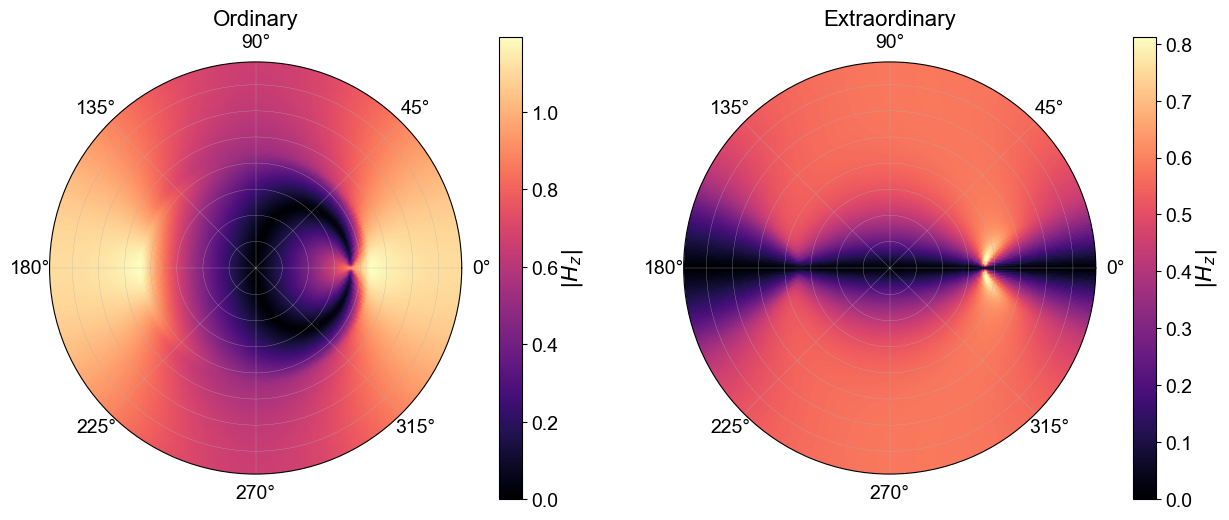

In [95]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile.transmitted_Hz[:,:,0])**2.), cmap='magma', vmin=0.)
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile.transmitted_Hz[:,:,1])**2.), cmap='magma', vmin=0.)
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.07)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.07)

cbar1.set_label(r'$|H_z|$', labelpad=1)
cbar2.set_label(r'$|H_z|$', labelpad=1)

axs[0].grid(linewidth=0.2)
axs[1].grid(linewidth=0.2)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title(r'Ordinary')
axs[1].set_title(r'Extraordinary')

Text(0.5, 1.0, 'Extraordinary')

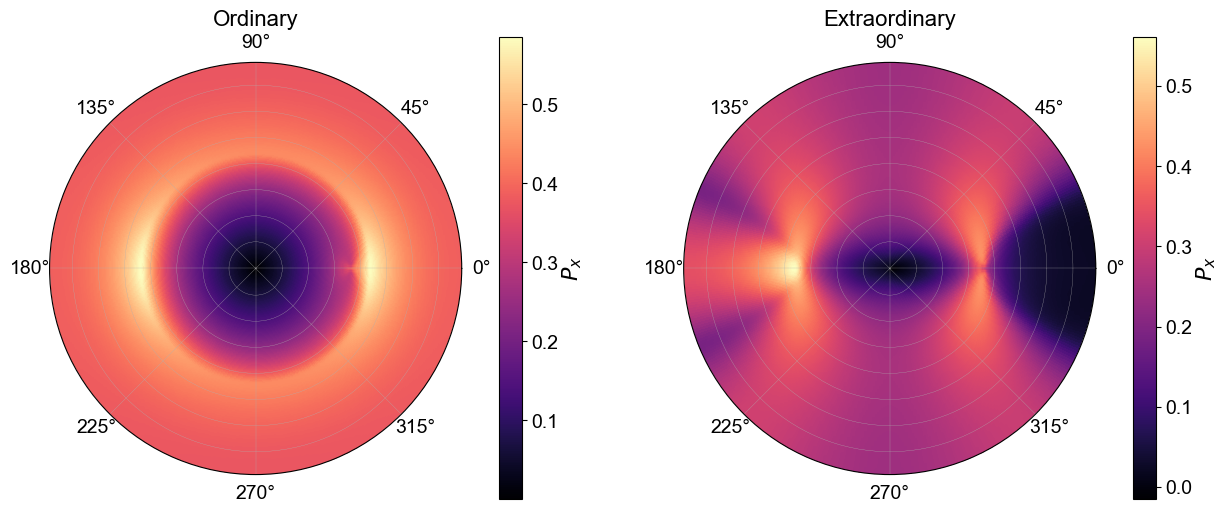

In [96]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), layer.profile.transmitted_Px[:,:,0], cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), layer.profile.transmitted_Px[:,:,1], cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.07)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.07)

cbar1.set_label(r'$P_x$', labelpad=1)
cbar2.set_label(r'$P_x$', labelpad=1)

axs[0].grid(linewidth=0.2)
axs[1].grid(linewidth=0.2)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title(r'Ordinary')
axs[1].set_title(r'Extraordinary')

Text(0.5, 1.0, 'Extraordinary')

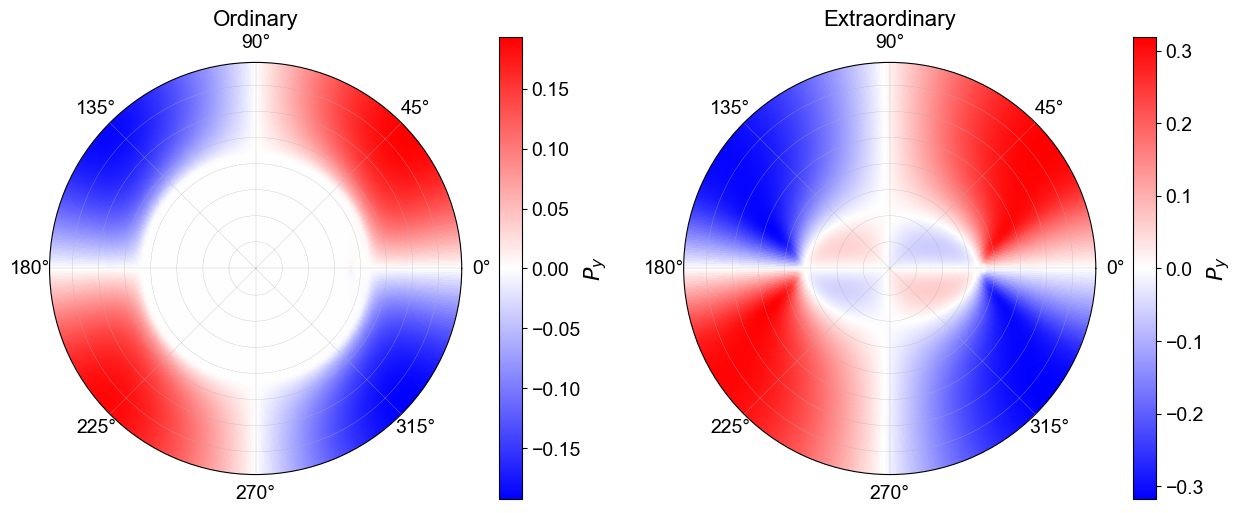

In [97]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), layer.profile.transmitted_Py[:,:,0], cmap='bwr')
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), layer.profile.transmitted_Py[:,:,1], cmap='bwr')
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.07)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.07)

cbar1.set_label(r'$P_y$', labelpad=1)
cbar2.set_label(r'$P_y$', labelpad=1)

axs[0].grid(linewidth=0.2)
axs[1].grid(linewidth=0.2)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title(r'Ordinary')
axs[1].set_title(r'Extraordinary')

Text(0.5, 1.0, 'Extraordinary')

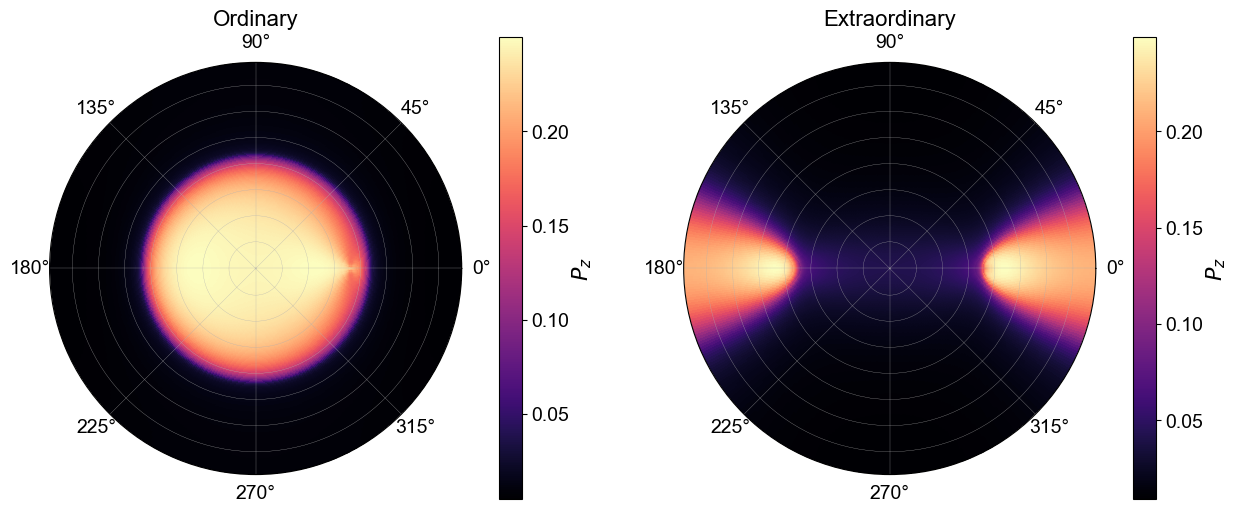

In [98]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), layer.profile.transmitted_Pz[:,:,0], cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), layer.profile.transmitted_Pz[:,:,1], cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.07)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.07)

cbar1.set_label(r'$P_z$', labelpad=1)
cbar2.set_label(r'$P_z$', labelpad=1)

axs[0].grid(linewidth=0.2)
axs[1].grid(linewidth=0.2)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title(r'Ordinary')
axs[1].set_title(r'Extraordinary')

Text(0.5, 1.0, 'Extraordinary')

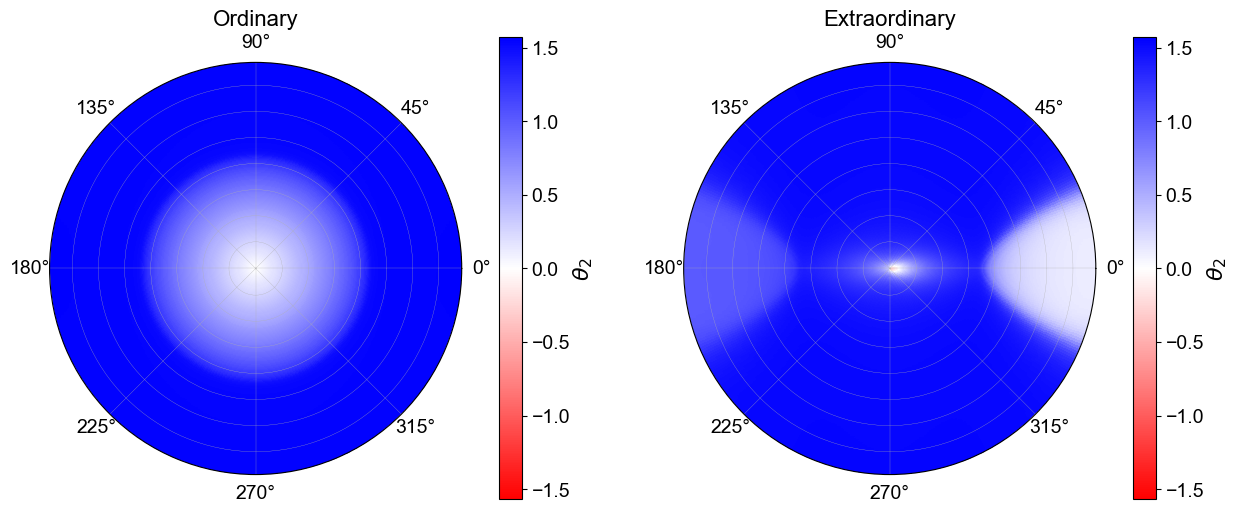

In [99]:
refraction_angle = tf.math.atan(layer.profile.transmitted_Px/layer.profile.transmitted_Pz)
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), (refraction_angle[:,:,0]), cmap='bwr_r', vmax = np.pi/2, vmin = -np.pi/2)
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), (refraction_angle[:,:,1]), cmap='bwr_r', vmax = np.pi/2, vmin = -np.pi/2)
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.07)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.07)

cbar1.set_label(r'$\theta_{2}$', labelpad=1)
cbar2.set_label(r'$\theta_{2}$', labelpad=1)

axs[0].grid(linewidth=0.2)
axs[1].grid(linewidth=0.2)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title(r'Ordinary')
axs[1].set_title(r'Extraordinary')

# Hyperbolic Dispersion Curves

In [86]:
eps_prism = 50.

payload = json.dumps({
    "ScenarioData": {
    "type": "Dispersion",
    "frequency": 460
},
"Layers": [
    {
        "type": "Ambient Incident Layer",
        "permittivity": eps_prism
    },
    {
        "type": "Semi Infinite Anisotropic Layer",
        "material": "Quartz",
        "rotationX": 0,
        "rotationY": 0,
        "rotationZ": 0,
    }
],
})
payload = json.loads(payload)

In [87]:
structure = Structure()
structure.get_scenario(payload.get('ScenarioData'))
structure.get_layers(payload.get("Layers", None))
layer = structure.layers[-1]
transmitted = layer.profile['transmitted']['propagation']
reflected = layer.profile['reflected']['propagation']

In [88]:
%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib import cm

Text(0.5, 0, '$Re[k_z/k_0]$')

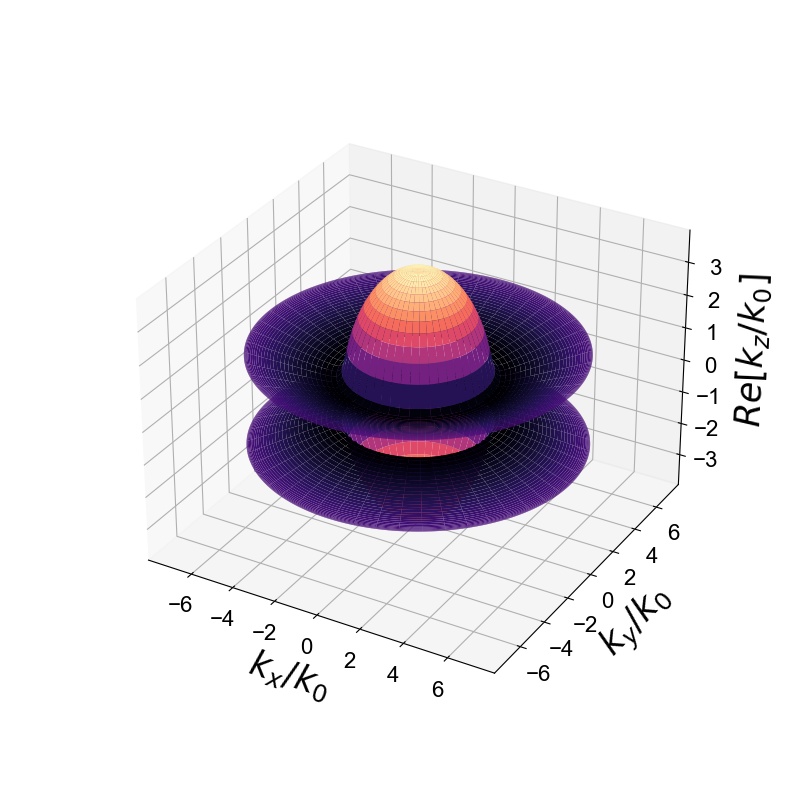

In [89]:
# Create a meshgrid of the azimuthal and incident angles
azimuthal_angles, incident_angles = np.meshgrid(structure.azimuthal_angle, structure.incident_angle)

# Convert to Cartesian coordinates for plotting
X = tf.sqrt(eps_prism) * np.sin(incident_angles) * np.cos(azimuthal_angles)
Y = tf.sqrt(eps_prism) * np.sin(incident_angles) * np.sin(azimuthal_angles)

# Your Z data; for example, transmitted[:,:,1]
Z_transmitted = tf.math.imag(transmitted[:,:,1])
Z_reflected = tf.math.imag(reflected[:,:,1])

# Plot the surface
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z_transmitted, cmap= cm.magma)  # Transmitted surface
ax.plot_surface(X, Y, Z_reflected, cmap= cm.magma_r)    # Reflected surface

# Labels
ax.set_xlabel(r'$k_x/k_0$',labelpad = 10)
ax.set_ylabel(r'$k_y/k_0$',labelpad = 10)
ax.set_zlabel(r'$Re[k_z/k_0]$',labelpad = 10)


In [51]:
plt.close()